In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pickle

In [47]:
data = pd.read_csv('./complete.csv')

In [48]:
data.isnull().values.any()

True

In [49]:
# Select the columns to be dropped (based on domain knowledge)
drop_features = ["ID", "name", "full_name", "club_logo", "birth_date", "flag", "photo", "preferred_foot", "eur_release_clause", "gk_diving", "gk_handling", "gk_kicking", "gk_positioning", "gk_reflexes", "1_on_1_rush_trait", "argues_with_officials_trait", "backs_into_player_trait",	"diver_trait", "fan's_favourite_trait",	"gk_flat_kick_trait", "gk_long_throw_trait", "gk_up_for_corners_trait", "leadership_trait",	"one_club_player_trait", "puncher_trait", "rushes_out_of_goal_trait", "saves_with_feet_trait", "second_wind_trait", "selfish_trait", "tactician_speciality", "prefers_gk"]

In [50]:
# `data_1` is the dataframe that contains the relevant attributes (after performing the drop)
data_1 = data[[item for item in list(data.columns) if item not in drop_features]]

In [51]:
data_1.head()

,club,special,age,league,height_cm,weight_kg,body_type,real_face,nationality,eur_value,...,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
0,Real Madrid CF,2228,32,Spanish Primera División,185.0,80.0,C. Ronaldo,True,Portugal,95500000.0,...,False,False,False,False,False,False,False,False,False,False
1,FC Barcelona,2158,30,Spanish Primera División,170.0,72.0,Messi,True,Argentina,105000000.0,...,False,False,False,False,False,False,False,False,False,False
2,Paris Saint-Germain,2100,25,French Ligue 1,175.0,68.0,Neymar,True,Brazil,123000000.0,...,False,False,False,False,False,False,False,False,False,False
3,FC Barcelona,2291,30,Spanish Primera División,182.0,86.0,Normal,True,Uruguay,97000000.0,...,False,False,False,False,False,False,False,False,False,False
4,FC Bayern Munich,1493,31,German Bundesliga,193.0,92.0,Normal,True,Germany,61000000.0,...,False,False,False,False,False,False,False,False,False,False


In [52]:
# Columns which contain `null` values
for i in list(data_1.columns):
    if data_1[i].isnull().values.any():
        print(i, end=" ")

club league rs rw rf ram rcm rm rdm rcb rb rwb st lw cf cam cm lm cdm cb lb lwb ls lf lam lcm ldm lcb gk 

In [53]:
# club and league NaN values are asigned as "Unknown"
data_1.club.fillna("Unknown", inplace=True)
data_1.league.fillna("Unknown", inplace=True)

/home/gopuvenkat/.local/share/virtualenvs/ML-wVqbzvB_/lib/python3.5/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [54]:
data_1.club.isnull().values.any()

False

In [55]:
# Identify the indices of rows which have a goal-keeper
index = data_1[~data_1.gk.isnull()].index

In [56]:
# Drop the goal-keeper rows and the associated `gk` column
data_2 = data_1.drop(index=index, columns=["gk"])

In [57]:
data_2.shape

(15973, 153)

In [58]:
# Columns which have a bool value (True/False)
tf_col = ["real_face", "acrobatic_clearance_trait", "avoids_using_weaker_foot_trait", "bicycle_kicks_trait", "cautious_with_crosses_trait", "chip_shot_trait", "chipped_penalty_trait", "comes_for_crosses_trait", "corner_specialist_trait", "dives_into_tackles_trait", "diving_header_trait", "driven_pass_trait", "early_crosser_trait", "fancy_flicks_trait", "finesse_shot_trait", "flair_trait", "flair_passes_trait", "giant_throw_in_trait", "inflexible_trait", "injury_free_trait", "injury_prone_trait", "long_passer_trait", "long_shot_taker_trait", "long_throw_in_trait", "outside_foot_shot_trait", "playmaker_trait", "power_free_kick_trait", "power_header_trait", "skilled_dribbling_trait", "stutter_penalty_trait", "swerve_pass_trait", "takes_finesse_free_kicks_trait", "target_forward_trait", "team_player_trait", "technical_dribbler_trait", "tries_to_beat_defensive_line_trait", "poacher_speciality", "speedster_speciality", "aerial_threat_speciality", "dribbler_speciality", "playmaker_speciality", "engine_speciality", "distance_shooter_speciality", "crosser_speciality", "free_kick_specialist_speciality", "tackling_speciality", "acrobat_speciality", "strength_speciality", "clinical_finisher_speciality", "prefers_rs", "prefers_rw", "prefers_rf", "prefers_ram", "prefers_rcm", "prefers_rm", "prefers_rdm", "prefers_rcb", "prefers_rb", "prefers_rwb", "prefers_st", "prefers_lw", "prefers_cf", "prefers_cam", "prefers_cm", "prefers_lm", "prefers_cdm", "prefers_cb", "prefers_lb", "prefers_lwb", "prefers_ls", "prefers_lf", "prefers_lam", "prefers_lcm", "prefers_ldm", "prefers_lcb"]

In [59]:
# Represent the bool values as numeric data
# True === 1, False === 0
for i in tf_col:
    data_2[i] = data_2[i].apply(lambda x: 1 if x else 0)

In [60]:
labelEncoder = LabelEncoder()

In [61]:
# Encode the string attributes using the LabelEncoder
data_2['club_le'] = labelEncoder.fit_transform(data_2.club)
data_2['league_le'] = labelEncoder.fit_transform(data_2.league)
data_2['body_type_le'] = labelEncoder.fit_transform(data_2.body_type)
data_2['nationality_le'] = labelEncoder.fit_transform(data_2.nationality)
data_2['work_rate_att_le'] = labelEncoder.fit_transform(data_2.work_rate_att)
data_2['work_rate_def_le'] = labelEncoder.fit_transform(data_2.work_rate_def)

In [62]:
# Feature Engineering
# Represents the sum of number of prefered positions of a player
data_2['prefers_pos_sum'] = data_2.prefers_rs + data_2.prefers_rw + data_2.prefers_rf + data_2.prefers_ram + data_2.prefers_rcm + data_2.prefers_rm + data_2.prefers_rdm + data_2.prefers_rcb + data_2.prefers_rb + data_2.prefers_rwb + data_2.prefers_st + data_2.prefers_lw + data_2.prefers_cf + data_2.prefers_cam + data_2.prefers_cm + data_2.prefers_lm + data_2.prefers_cdm + data_2.prefers_cb + data_2.prefers_lb + data_2.prefers_lwb + data_2.prefers_ls + data_2.prefers_lf + data_2.prefers_lam + data_2.prefers_lcm + data_2.prefers_ldm + data_2.prefers_lcb

In [63]:
# Feature Engineering
# Represents the sum of number of traits/speciality of a player
data_2['traits_sum'] = data_2.acrobatic_clearance_trait + data_2.avoids_using_weaker_foot_trait + data_2.bicycle_kicks_trait + data_2.cautious_with_crosses_trait + data_2.chip_shot_trait + data_2.chipped_penalty_trait + data_2.comes_for_crosses_trait + data_2.corner_specialist_trait + data_2.dives_into_tackles_trait + data_2.diving_header_trait + data_2.driven_pass_trait + data_2.early_crosser_trait + data_2.fancy_flicks_trait + data_2.finesse_shot_trait + data_2.flair_trait + data_2.flair_passes_trait + data_2.giant_throw_in_trait + data_2.inflexible_trait + data_2.injury_free_trait + data_2.injury_prone_trait + data_2.long_passer_trait + data_2.long_shot_taker_trait + data_2.long_throw_in_trait + data_2.outside_foot_shot_trait + data_2.playmaker_trait + data_2.power_free_kick_trait + data_2.power_header_trait + data_2.skilled_dribbling_trait + data_2.stutter_penalty_trait + data_2.swerve_pass_trait + data_2.takes_finesse_free_kicks_trait + data_2.target_forward_trait + data_2.team_player_trait + data_2.technical_dribbler_trait + data_2.tries_to_beat_defensive_line_trait + data_2.poacher_speciality + data_2.speedster_speciality + data_2.aerial_threat_speciality + data_2.dribbler_speciality + data_2.playmaker_speciality + data_2.engine_speciality + data_2.distance_shooter_speciality + data_2.crosser_speciality + data_2.free_kick_specialist_speciality + data_2.tackling_speciality + data_2.acrobat_speciality + data_2.strength_speciality + data_2.clinical_finisher_speciality

In [64]:
data_2.head()

,club,special,age,league,height_cm,weight_kg,body_type,real_face,nationality,eur_value,...,prefers_ldm,prefers_lcb,club_le,league_le,body_type_le,nationality_le,work_rate_att_le,work_rate_def_le,prefers_pos_sum,traits_sum
0,Real Madrid CF,2228,32,Spanish Primera División,185.0,80.0,C. Ronaldo,1,Portugal,95500000.0,...,0,0,466,34,1,118,0,1,2,9
1,FC Barcelona,2158,30,Spanish Primera División,170.0,72.0,Messi,1,Argentina,105000000.0,...,0,0,219,34,3,5,2,2,3,9
2,Paris Saint-Germain,2100,25,French Ligue 1,175.0,68.0,Neymar,1,Brazil,123000000.0,...,0,0,432,14,4,18,0,2,1,7
3,FC Barcelona,2291,30,Spanish Primera División,182.0,86.0,Normal,1,Uruguay,97000000.0,...,0,0,219,34,5,154,0,2,1,4
5,FC Bayern Munich,2146,28,German Bundesliga,185.0,79.0,Normal,1,Poland,92000000.0,...,0,0,222,18,5,117,0,2,1,4


In [65]:
# Correlation matrix
corr = data_2.corr()
cor_dict = corr['overall'].sort_values(ascending=False).to_dict()
corr['overall'].sort_values(ascending=False)

overall                        1.000000
reactions                      0.835449
special                        0.794558
composure                      0.773689
cm                             0.762461
rcm                            0.762461
lcm                            0.762461
ball_control                   0.702175
short_passing                  0.698954
potential                      0.670298
rs                             0.663042
ls                             0.663042
st                             0.663042
pas                            0.659460
rm                             0.654209
lm                             0.654209
cam                            0.647561
ram                            0.647561
lam                            0.647561
cf                             0.633769
lf                             0.633769
rf                             0.633769
eur_value                      0.632730
lwb                            0.625556
rwb                            0.625556


In [66]:
# Feature Engineering
# Compute BMI from height and weight
data_2['bmi'] = data_2.weight_kg / (data_2.height_cm/100.0)**2

In [67]:
data_2.body_type.value_counts()

Normal        9150
Lean          5779
Stocky        1039
Shaqiri          1
Akinfenwa        1
C. Ronaldo       1
Neymar           1
Messi            1
Name: body_type, dtype: int64

In [68]:
# Dataset has outliers, clean them up by setting them to appropriate values
# Values have been set based on the domain knowledge
data_2.loc[data_2.body_type == 'Neymar', 'body_type'] = 'Lean'
data_2.loc[data_2.body_type == 'Messi', 'body_type'] = 'Lean'
data_2.loc[data_2.body_type == 'Shaqiri', 'body_type'] = 'Normal'
data_2.loc[data_2.body_type == 'Akinfenwa', 'body_type'] = 'Stocky'
data_2.loc[data_2.body_type == 'C. Ronaldo', 'body_type'] = 'Normal'

In [69]:
minmax = MinMaxScaler()

In [70]:
# Columns to be normalized
col = ["age", "height_cm", "weight_kg", "real_face", "eur_value", "eur_wage", "potential", "pac", "sho", "pas", "dri", "def", "phy", "international_reputation", "skill_moves"]

In [71]:
# Normalize the data using the `MinMaxScalar`
arr =  minmax.fit_transform(data_2[col])

/home/gopuvenkat/.local/share/virtualenvs/ML-wVqbzvB_/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [72]:
# Build the appropriate data frame (note that goal-keepers have been removed) - Set appropriate index
data_norm = pd.DataFrame(arr,columns=col,index=data_2.index)

In [73]:
data_norm.shape

(15973, 15)

In [74]:
# Aggregate feature set
features = ["club_le", "real_face", "age", "league_le", "height_cm", "weight_kg", "body_type_le", "nationality_le", "eur_value", "eur_wage", "potential", "pac", "sho", "pas", "dri", "def", "phy", "international_reputation", "skill_moves"]

Visualization

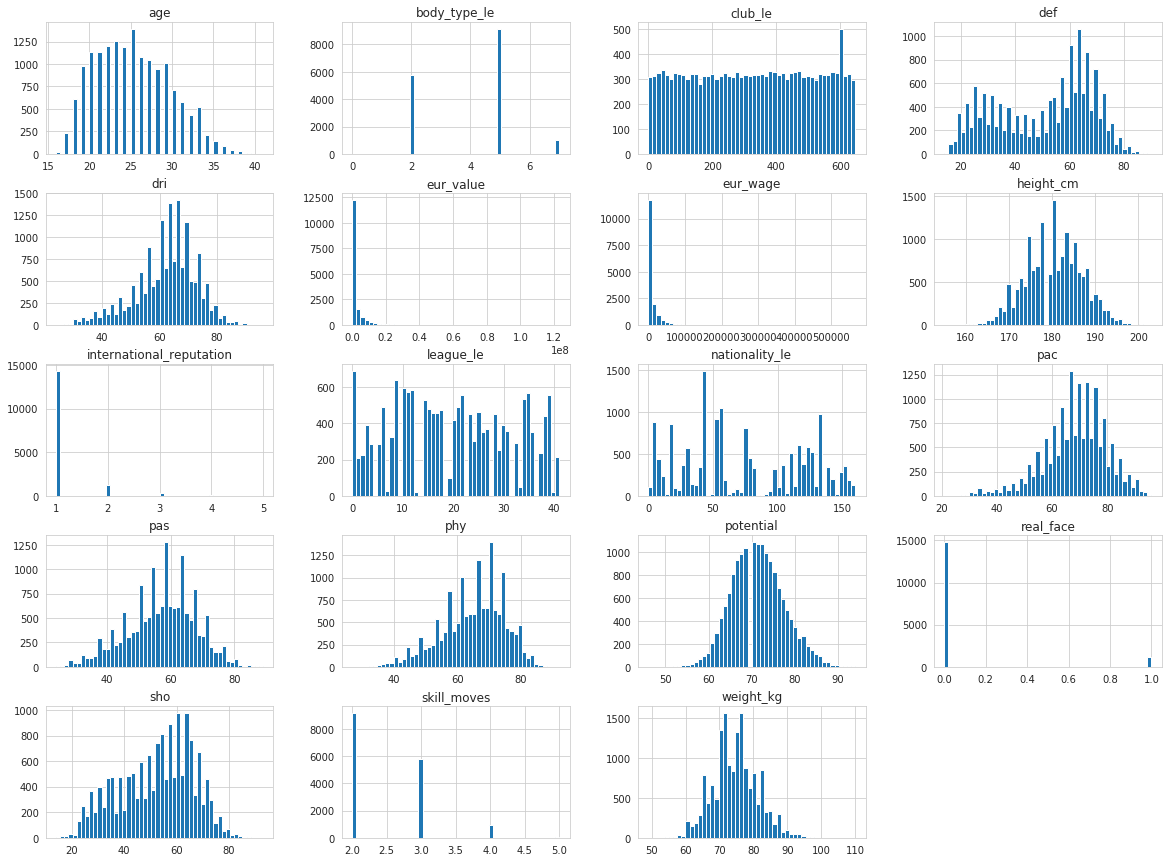

In [129]:
data_2[features].hist(bins=50, figsize=(20,15))
plt.savefig('hist.png')
plt.show()

In [76]:
attributes = ["age", "height_cm", "weight_kg", "real_face", "eur_value", "eur_wage", "potential", "pac", 
              "sho", "pas", "dri", "def", "phy", "international_reputation", "skill_moves"]

positions = ['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw',
             'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm',
             'ldm', 'lcb']

cols_pref = [x for x in data_2.columns if 'prefers' in x]
data_norm_prefs = data_2.loc[:, cols_pref]

y = data_norm_prefs.sum().sort_values(ascending=False)
x = np.arange(1, len(y) + 1)
cols_inc = [x for x in data_norm.columns]
cols_incl = [x for x in y.index if y[x] > 0]
data_norm_prefs = data_2.loc[:, cols_incl]
data_norm_att = data_norm.loc[:, attributes].applymap(lambda x: x)
data_norm_att = data_norm_att.loc[data_norm_att.sum(axis=1) > 0, cols_inc]
data_norm_att = data_norm_att.apply(lambda x: (x))


data_norm_prefs = data_norm_prefs.drop(columns = ['prefers_pos_sum'])

/home/gopuvenkat/.local/share/virtualenvs/ML-wVqbzvB_/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gopuvenkat/.local/share/virtualenvs/ML-wVqbzvB_/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gopuvenkat/.local/share/virtualenvs/ML-wVqbzvB_/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gopuvenkat/.local/share/virtualenvs/ML-wVqbzvB_/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in vers

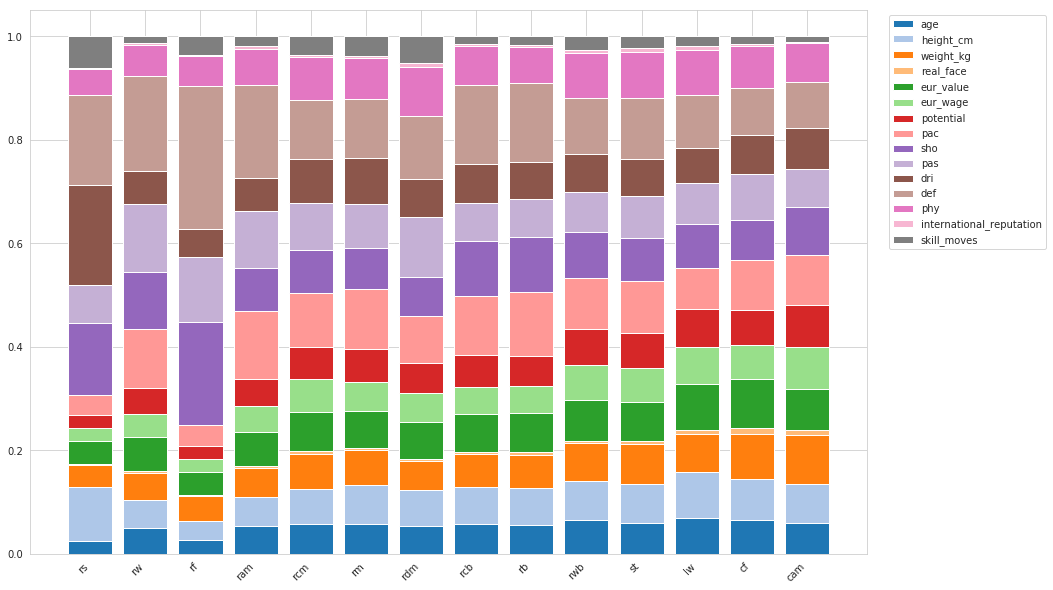

In [128]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
mclf = OneVsRestClassifier(clf)

mclf.fit(data_norm_att, data_norm_prefs)

feat_imp = pd.DataFrame()
feat_imp_sum = np.zeros(len(data_norm_prefs.columns))

fig, ax = plt.subplots(1,1, figsize=(15, 10))

x = 1
for l, e in zip(data_norm_prefs.columns, mclf.estimators_):
    feat_imp.loc[:, l] = e.feature_importances_

colors = np.concatenate((plt.cm.tab20(np.linspace(0, 1, 20)), plt.cm.Set3(np.linspace(0, 1, 10))))
x = np.arange(1, len(feat_imp.columns) + 1)
y = np.zeros(len(feat_imp.columns))
for n in range(0, len(feat_imp.index)):
    ax.bar(x, feat_imp.loc[n, :], bottom=y, label=data_norm_att.columns[n], color=colors[n])
    y += feat_imp.loc[n, :]

ax.set_xticks(x)
ax.set_xticklabels(positions,rotation = 45, ha="right")
ax.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.savefig('bar.png')

<Figure size 1440x1152 with 0 Axes>

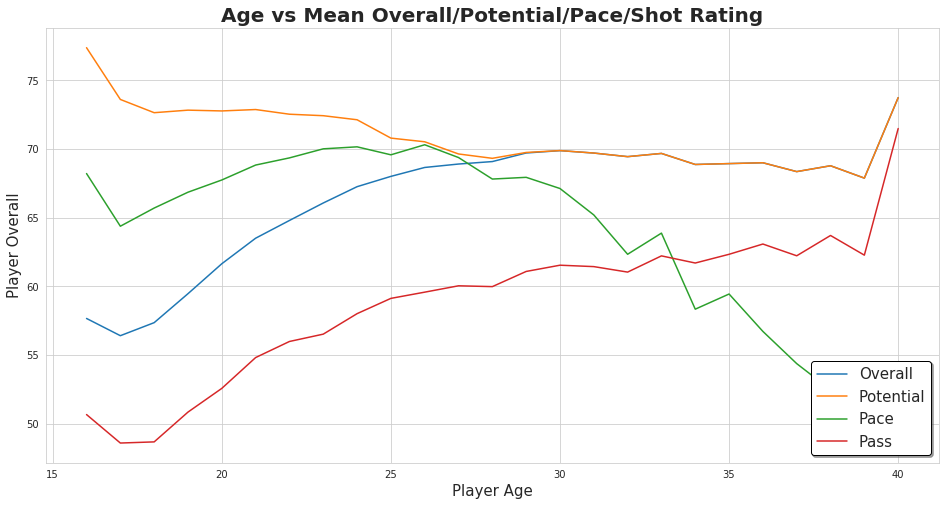

In [131]:
dataset40 = data_1.loc[data_1['age'] <= 40]
age = dataset40.sort_values("age")['age'].unique()
overall = dataset40.groupby("age")["overall"].mean().values
potential = dataset40.groupby("age")["potential"].mean().values
pace = dataset40.groupby("age")["pac"].mean().values
Pass = dataset40.groupby("age")["pas"].mean().values

plt.figure()
plt.figure(figsize=(16,8))
plt.title('Age vs Mean Overall/Potential/Pace/Shot Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.plot(age, pace, label="Pace")
plt.plot(age, Pass, label="Pass")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.savefig('chart.png')

/home/gopuvenkat/.local/share/virtualenvs/ML-wVqbzvB_/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


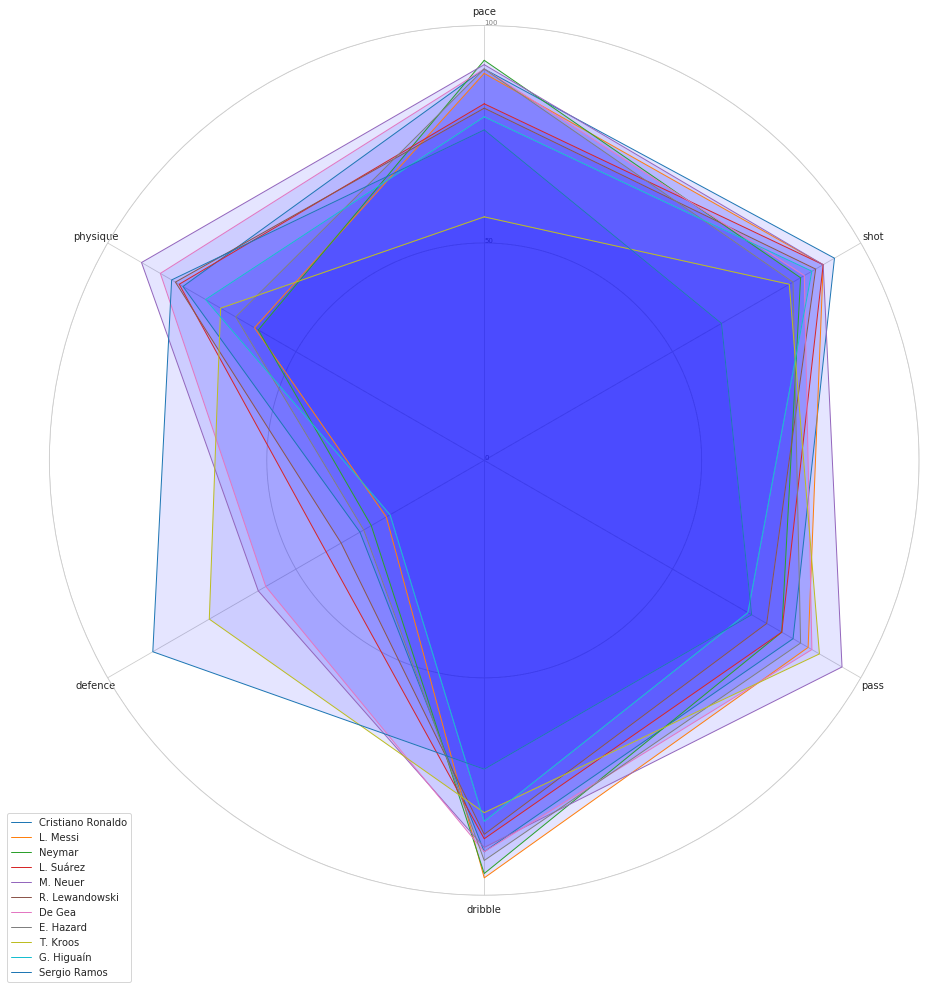

In [79]:
attr = ['name', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']
df = pd.DataFrame(data.loc[:10,attr])

from math import pi
categories = ['pace', 'shot', 'pass', 'dribble','defence', 'physique']
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i in range(df.shape[0]):
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,50,100], ["0","50","100"], color="grey", size=7)
    plt.ylim(0,100)

    values=df.loc[i].drop('name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.name[i])
    ax.fill(angles, values, 'b', alpha=0.1)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 20
    fig_size[1] = 16
    plt.rcParams["figure.figsize"] = fig_size
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.savefig('radar.png')

In [80]:
# List the label encoded columns
features_le = ["club_le", "league_le", "body_type_le", "nationality_le"]

In [81]:
data_2[features_le].shape, data_norm.shape

((15973, 4), (15973, 15))

In [82]:
# Stack both the data frames
data_3 = pd.concat([data_2, data_norm], axis=1)

In [122]:
data_3.shape

(15973, 177)

In [83]:
data_3.isnull().values.any()

False

Linear Regression

In [39]:
train, test = train_test_split(data_3, test_size=0.3, random_state=3, shuffle=True)
ytrain_ = train['overall']
Xtrain_ = train[features]
ytest_ = test['overall']
Xtest_ = test[features]
# Experiment - Linear Regression model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

# Validation score
# Evaluation criteria - Mean squared error
score = -1 * cross_val_score(clf, Xtrain_, ytrain_, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
score.mean()

# Train the model
clf.fit(Xtrain_, ytrain_)
# Evaluate the model based on the defined evaluation criteria
mean_squared_error(ytest_, clf.predict(Xtest_))
# Compute the R2 score of the model
clf.score(Xtest_, ytest_)
pickle.dump(clf, open('Linear_Regression.p', 'wb'))

4.1293386629610485

Multi Regression 

In [84]:
train_, test_ = train_test_split(data_3, test_size=0.3, random_state=3, shuffle=True)

In [85]:
# Define the target feature set for the problem
y_features = ["overall", "rs", "rw", "rf", "ram", "rcm", "rm", "rdm", "rcb", "rb", "rwb", "st", "lw", "cf", "cam", "cm", "lm", "cdm", "cb", "lb", "lwb", "ls", "lf", "lam", "lcm", "ldm", "lcb"]

In [86]:
print(features)

['club_le', 'real_face', 'age', 'league_le', 'height_cm', 'weight_kg', 'body_type_le', 'nationality_le', 'eur_value', 'eur_wage', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'international_reputation', 'skill_moves']


In [87]:
Ytrain_ = train_[y_features]
Xtrain_ = train_[features]
Ytest_ = test_[y_features]
Xtest_ = test_[features]

In [88]:
# Multi-target regression is a stratergy of fitting one regressor per target. This is a simple stratergy for extending regressors that do not natively support multi-target regression
from sklearn.multioutput import MultiOutputRegressor
# Gradient Boosting for regression - In each stage a regression tree is fit on the negative gradient of the given loss function
# Default loss function = Least square regression
from sklearn.ensemble import GradientBoostingRegressor
clf =  MultiOutputRegressor(GradientBoostingRegressor(), n_jobs=-1)

In [89]:
# Validation score
# Evaluation criteria - Mean squared error
score = -1 * cross_val_score(clf, Xtrain_, Ytrain_, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
score.mean()

1.5028032796874757

In [90]:
# Train the model
clf.fit(Xtrain_, Ytrain_)

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
           n_jobs=-1)

In [91]:
# Evaluate the model based on the defined evaluation criteria
mean_squared_error(Ytest_, clf.predict(Xtest_))

1.505344312908676

In [92]:
# Compute the R2 score of the model
clf.score(Xtest_, Ytest_)

0.9835432976026778

In [93]:
pickle.dump(clf, open('MultiOutputRegressor_GradientBoostingRegressor.p', 'wb'))

Decision Tree regressor

In [94]:
# A decision tree regressor
from sklearn.tree import DecisionTreeRegressor
clf =  DecisionTreeRegressor()

In [95]:
# Validation score
# Evaluation criteria - Mean squared error
score = -1 * cross_val_score(clf, Xtrain_, Ytrain_, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
score.mean()

5.9215799289138

In [96]:
# Train the model
clf.fit(Xtrain_, Ytrain_)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [97]:
# Evaluate the model based on the defined evaluation criteria
mean_squared_error(Ytest_, clf.predict(Xtest_))

5.478451740555247

In [98]:
# Compute the R2 score of the model
clf.score(Xtest_, Ytest_)

0.9433379967521014

In [99]:
pickle.dump(clf, open('DecisionTreeRegressor.p', 'wb'))

Multi Output RandomForest

In [132]:
# A random forest is a meta estimator that fits a number of decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and controls over-fitting
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_jobs=-1, n_estimators=500, max_depth=15)

In [133]:
# Validation score
# Evaluation criteria - Mean squared error
score = -1 * cross_val_score(clf, Xtrain_, Ytrain_, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
score.mean()

2.1973704291525333

In [134]:
# Train the model
clf.fit(Xtrain_, Ytrain_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [135]:
# Evaluate the model based on the defined evaluation criteria
mean_squared_error(Ytest_, clf.predict(Xtest_))

2.031976573843478

In [136]:
# Compute the R2 score of the model
clf.score(Xtest_, Ytest_)

0.9789838683118336

In [137]:
pickle.dump(clf, open('RandomForestRegressor.p', 'wb'))

PCA

In [106]:
string_features = ['club', 'league', 'body_type', 'nationality', 'work_rate_att', 'work_rate_def']

In [107]:
train_, test_ = train_test_split(data_3, test_size=0.3, random_state=3, shuffle=True)

In [108]:
Xtrain2_ = train_[[item for item in list(data_3.columns) if item not in ['overall']+string_features]]
Xtest2_ = test_[[item for item in list(data_3.columns) if item not in ['overall']+string_features]]

In [110]:
# PCA for dimension reduction(from 177 to 50)
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(Xtrain2_, Ytrain_)

In [112]:
# Transforming the X labels into PCA X labels with reduced dimensionality
Xtrain_pca = pca.transform(Xtrain2_)
Xtest_pca = pca.transform(Xtest2_)

In [114]:
Xtrain_pca.shape, Xtrain_.shape

((11181, 50), (11181, 34))

In [123]:
# Create the multi regressor model
clf =  MultiOutputRegressor(GradientBoostingRegressor(), n_jobs=-1)

In [124]:
# Validation score
# Evaluation criteria - Mean squared error
score = -1 * cross_val_score(clf, Xtrain_, Ytrain_, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
score.mean()

1.502770488982448

In [126]:
# Train the model with PCA components
clf.fit(Xtrain_pca, Ytrain_)

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
           n_jobs=-1)

In [127]:
# Evaluate the model based on the defined evaluation criteria
mean_squared_error(Ytest_, clf.predict(Xtest_pca))

1.869703982621596

In [117]:
# Compute the R2 score of the model
clf.score(Xtest_pca, Ytest_)

0.9799144309390441

In [121]:
pickle.dump(clf, open('MultiOutputRegressor_GradientBoostingRegressor_PCA.p', 'wb'))